### How well do jobs and Skills Pay for Data Scientist?

#### Methology

###### 1. Evaluate median salary for top 6 Data Jobs
###### 2. Find median salary per skills for Data Scientist
###### 3. Visulize for highest paying skills and most demanded skills

In [50]:
#importing libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
# loading Data
dataset= load_dataset("lukebarousse/data_jobs")
df=dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']= df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

#Filter For Data Scientist Data
#df_DS= df[df["job_title_short"]=="Data Scientist"].copy()

In [51]:
# Filter for job titles and country

df_pak=df[(df["job_country"]== "Pakistan")].dropna(subset=['salary_year_avg'])

In [52]:
job_titles=df_pak["job_title_short"].value_counts().index[:6].tolist()

job_titles

['Data Engineer',
 'Machine Learning Engineer',
 'Data Scientist',
 'Business Analyst',
 'Data Analyst',
 'Software Engineer']

In [53]:
df_pak_top6=df_pak[df_pak['job_title_short'].isin(job_titles)]

In [54]:
job_order=df_pak_top6.groupby("job_title_short")['salary_year_avg'].median().sort_values(ascending=False).index

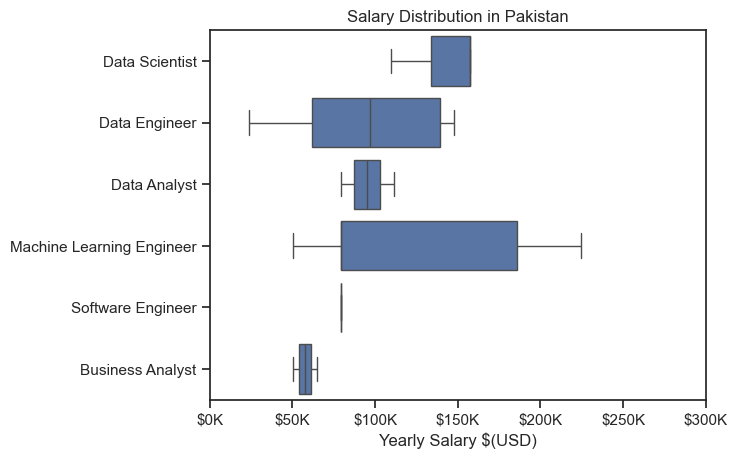

In [55]:
sns.boxplot(data=df_pak_top6, x='salary_year_avg', y='job_title_short',order=job_order)

plt.title("Salary Distribution in Pakistan")
plt.xlabel("Yearly Salary $(USD)")
plt.ylabel("")
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0,300000)
plt.show()

### Investigate Median Salary  Vs Skill for Data Scientist

In [56]:
df_DS_Pak=df[(df['job_title_short']== 'Data Scientist') & (df["job_country"]== "Pakistan")].copy()

df_DS_Pak=df_DS_Pak.dropna(subset=["salary_year_avg"])

In [57]:
df_DS_Pak=df_DS_Pak.explode('job_skills')

df_DS_Pak[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
75724,157500.0,python
75724,157500.0,sql
75724,157500.0,r
75724,157500.0,tableau
87668,109500.0,r


In [61]:
df_DS_top_pay=df_DS_Pak.groupby("job_skills")["salary_year_avg"].agg(["count", 'median']).sort_values(by='median', ascending=False)
df_DS_top_pay=df_DS_top_pay.head(10)
df_DS_top_pay

,count,median
job_skills,,
python,3,157500.0
r,3,157500.0
sql,3,157500.0
hadoop,2,133500.0
tableau,2,133500.0
nosql,1,109500.0
power bi,1,109500.0
spark,1,109500.0


In [62]:
df_DS_skills= df_DS_Pak.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
df_DS_skills=df_DS_skills.head(10).sort_values(by='median',ascending=False) 
df_DS_skills

,count,median
job_skills,,
python,3,157500.0
r,3,157500.0
sql,3,157500.0
hadoop,2,133500.0
tableau,2,133500.0
nosql,1,109500.0
power bi,1,109500.0
spark,1,109500.0


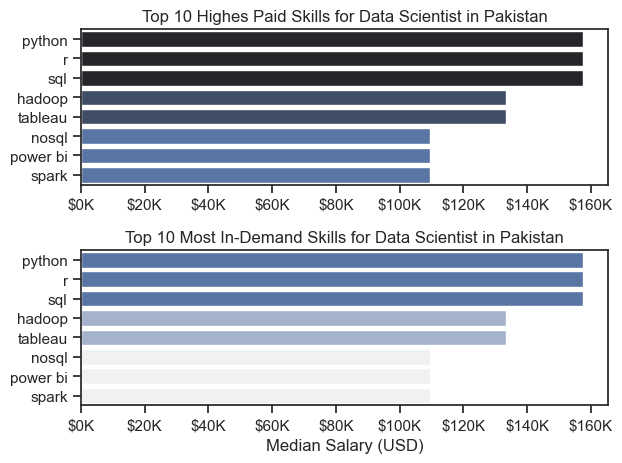

In [63]:
fig, ax=plt.subplots(2,1)

sns.set_theme(style='ticks')
#Top 10 Highest paid Skills for Data Scientist
sns.barplot(data=df_DS_top_pay ,x='median', y=df_DS_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')
ax[0].legend().remove()

#df_DS_US_top_pay [::-1].plot(kind="barh", y="median", ax=ax[0], legend=False)
ax[0].set_title("Top 10 Highes Paid Skills for Data Scientist in Pakistan")
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-demand skills for Data Scientist
sns.barplot(data=df_DS_skills,x='median' ,y=df_DS_skills.index, ax=ax[1], hue="median" ,palette='light:b')
ax[1].legend().remove()
# df_DS_US_skills[::-1].plot(kind="barh", y="median", ax=ax[1],legend=False)
ax[1].set_title("Top 10 Most In-Demand Skills for Data Scientist in Pakistan")
ax[1].set_xlabel("Median Salary (USD)")
ax[1].set_ylabel("")
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K' ))

ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()